Based on https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

# Modules Import

In [2]:
# Importing known prerequisites
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge

# Data Exploration

In [3]:
train_data = pd.read_csv('../datasets/house prices/train.csv')
test_data = pd.read_csv('../datasets/house prices/test.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
# first_10_columns = train_data.iloc[:, :20]
# sns.pairplot(first_10_columns)
# plt.show()


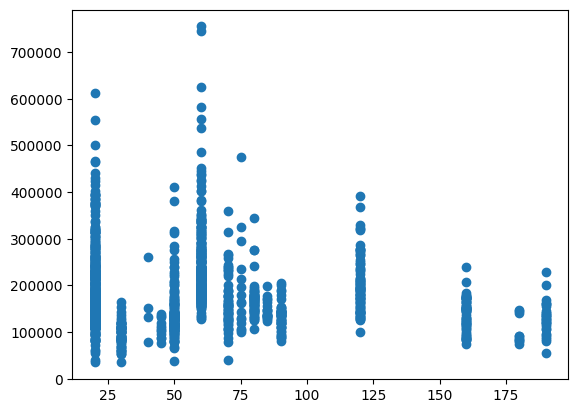

In [9]:
plt.scatter (x='MSSubClass', y='SalePrice', data=train_data) #//# dataframe feed data and column names separately

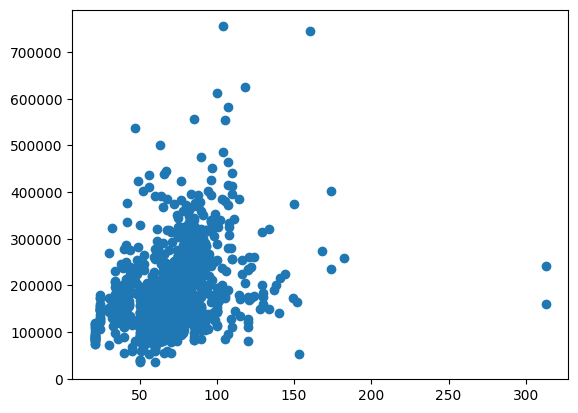

In [10]:
plt.scatter (x='LotFrontage', y='SalePrice', data=train_data)

Outliers can be noticed around 300 on the horizontal axis.

In [11]:
train_data.query('LotFrontage > 300') #//# to spot the outliers

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Those will thus be removed

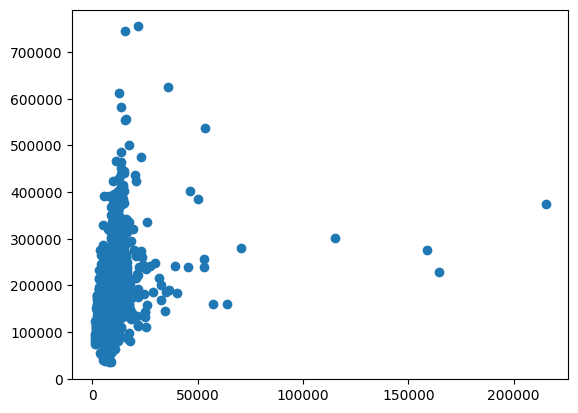

In [12]:
plt.scatter (x='LotArea', y='SalePrice', data=train_data)

In [13]:
train_data.query('LotArea > 55000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


In [14]:
stats.zscore(train_data['LotArea'].sort_values().tail(10)) #//# stats module documentation, on zscore
# mean = stats.tmean(data)
# std_dev = stats.tstd(data)
# variance = stats.tvar(data)
# summary = stats.describe(data)

384    -0.842948
457    -0.840817
769    -0.835898
1396   -0.770262
1298   -0.651510
451    -0.529437
706     0.258832
249     1.037564
335     1.138078
313     2.036397
Name: LotArea, dtype: float64

In [15]:
#//# z-score explained in stats: distance from the mean (e.g. z-score of 2 means 2 from the mean and of -1 means -1 from the mean, on a graph negative means to the left of the mean and positive is to the right), formula is (x-mu)/sigma (where mu is the mean and sigma the standard deviation and x a data point)
# train_data['LotArea'].sort_values().tail(1) #//# specific number of elements from the tail


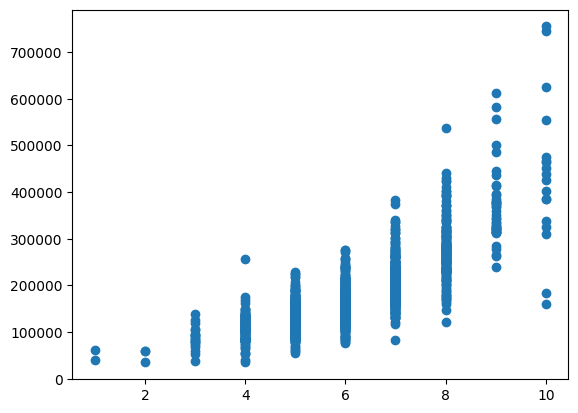

In [16]:
plt.scatter (x='OverallQual', y='SalePrice', data=train_data)

#//# compared features to label in order to know where outliers were standing

Noticed low values when OverallQual equals to 10

In [17]:
train_data.query('OverallQual == 10')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


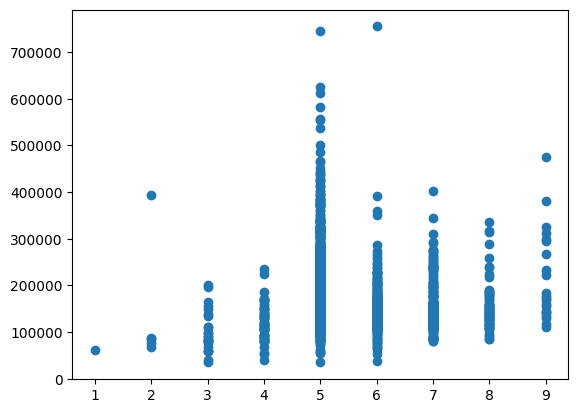

In [18]:
plt.scatter (x='OverallCond', y='SalePrice', data=train_data)

In [19]:
train_data.query('OverallQual == 2')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
636,637,30,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,ConLw,Normal,60000
916,917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311
1100,1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,1,2009,WD,Normal,60000


In [20]:
train_data.query('OverallCond == 5 & SalePrice > 700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [21]:
train_data.query('OverallCond == 6 & SalePrice > 700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


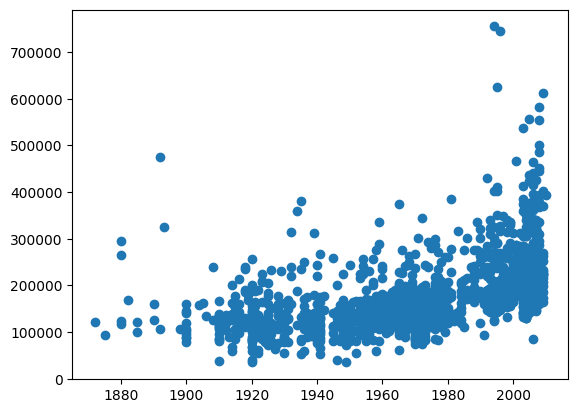

In [22]:
plt.scatter (x='YearBuilt', y='SalePrice', data=train_data)

In [23]:
train_data.query('YearBuilt < 1900 & SalePrice > 400000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


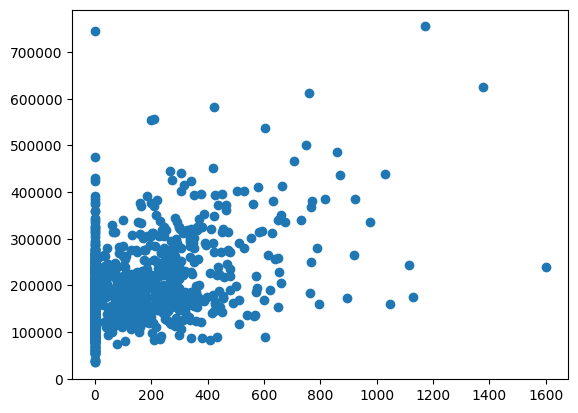

In [27]:
plt.scatter (x='MasVnrArea', y='SalePrice', data=train_data)
train_data.query('MasVnrArea > 1500')

In [26]:
train_data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
57,58,60,RL,89.0,11645,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,196500
117,118,20,RL,74.0,8536,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,New,Partial,155000
723,724,50,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,135000
81,82,120,RM,32.0,4500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,153500
1239,1240,20,RL,64.0,9037,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,265900


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


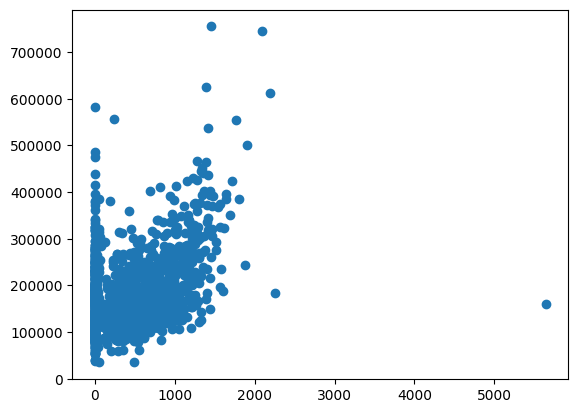

In [29]:
plt.scatter (x='BsmtFinSF1', y='SalePrice', data=train_data)
train_data.query('BsmtFinSF1 > 5000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
322,323,60,RL,86.0,10380,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,301000


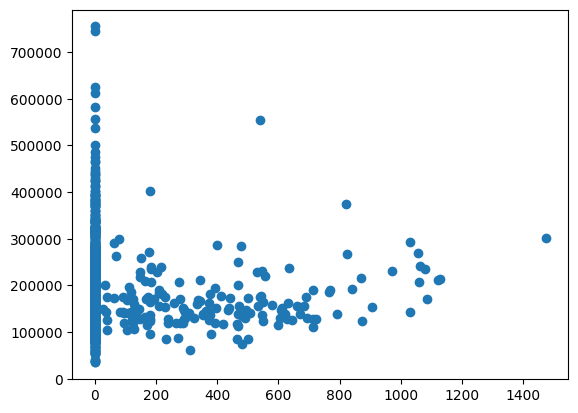

In [31]:
plt.scatter (x='BsmtFinSF2', y='SalePrice', data=train_data)
train_data.query('BsmtFinSF2 > 1400')

In [32]:
train_data.query('BsmtFinSF2 > 400 & SalePrice > 500000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


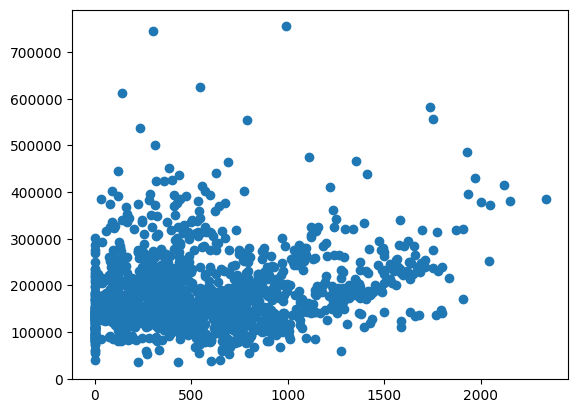

In [34]:
plt.scatter (x='BsmtUnfSF', y='SalePrice', data=train_data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


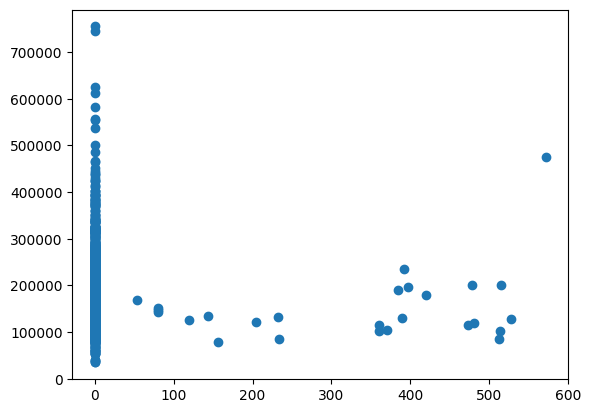

In [39]:
plt.scatter (x='LowQualFinSF', y='SalePrice', data=train_data)
train_data.query('LowQualFinSF > 500 & SalePrice > 400000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


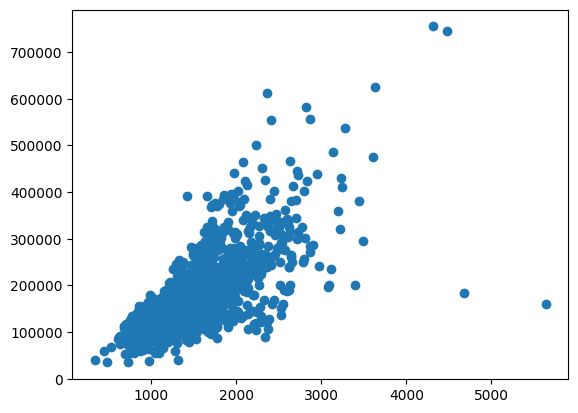

In [40]:
plt.scatter (x='GrLivArea', y='SalePrice', data=train_data)
train_data.query('GrLivArea > 4400')

In [44]:
values = [598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 186, 524, 739, 598, 955, 636, 1062, 1191, 496, 198, 1338]
train_data = train_data[train_data.Id.isin(values) == False] #//# remove outliers

In [45]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


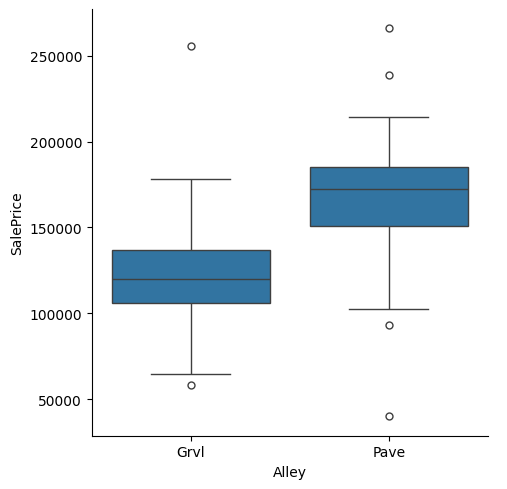

In [47]:
sns.catplot(data=train_data, x='Alley', y='SalePrice', kind="box") #//# catplot

In [53]:
train_data['MasVnrType'].fillna('No', inplace=True)
test_data['MasVnrType'].fillna('No', inplace=True)

In [56]:
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(0)
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(0)

In [61]:
focus = 'FireplaceQu'
filling = 0
train_data[focus] = train_data[focus].fillna(filling)
test_data[focus] = test_data[focus].fillna(filling)

In [58]:
pd.DataFrame(train_data.isnull().sum().sort_values(ascending=False)).head(20)

,0
PoolQC,1435
MiscFeature,1388
Alley,1350
Fence,1162
LotFrontage,255
GarageCond,76
GarageType,76
GarageYrBlt,76
GarageFinish,76
GarageQual,76


In [62]:
focus = 'LotFrontage'
filling = 0
train_data[focus] = train_data[focus].fillna(filling)
test_data[focus] = test_data[focus].fillna(filling)

In [63]:
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data['YearBuilt']) #//# fill with other column
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(test_data['YearBuilt'])

Supposed that garage building date is the same as house building date to preserve information without too much creating fake info.

In [64]:
focus = 'GarageType'
filling = 'No'
train_data[focus] = train_data[focus].fillna(filling)
test_data[focus] = test_data[focus].fillna(filling)

In [ ]:
focus = 'GarageQual'
filling = 'No'
train_data[focus] = train_data[focus].fillna(filling)
test_data[focus] = test_data[focus].fillna(filling)

In [66]:
#//# create pandas dataframe with lfocus = 'GarageQual'

In [68]:
filling = 'Unf'
focus = 'BsmtCond'
train_data[focus] = train_data[focus].fillna(filling)
test_data[focus] = test_data[focus].fillna(filling)

In [69]:
filling = 'SBrkr'
focus = 'Electrical'
train_data[focus] = train_data[focus].fillna(filling)
test_data[focus] = test_data[focus].fillna(filling)

In [71]:
train_data = train_data.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageCond', 'BsmtFinType2'])
test_data = test_data.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageCond', 'BsmtFinType2'])

# Feature Engineering

In [72]:
train_data['houseage'] = train_data['YrSold'] - train_data['YearBuilt']
test_data['houseage'] = test_data['YrSold'] - test_data['YearBuilt']

In [74]:
train_data['houseremodelage'] = train_data['YrSold'] - train_data['YearRemodAdd']
test_data['houseremodelage'] = test_data['YrSold'] - test_data['YearRemodAdd']

In [75]:
train_data['totalsf'] = train_data['1stFlrSF'] + train_data['2ndFlrSF'] + train_data['BsmtFinSF1'] + train_data['BsmtFinSF2']
test_data['totalsf'] = test_data['1stFlrSF'] + test_data['2ndFlrSF'] + test_data['BsmtFinSF1'] + test_data['BsmtFinSF2']

In [76]:
train_data['totalarea'] = train_data['GrLivArea'] + train_data['TotalBsmtSF']
test_data['totalarea'] = test_data['GrLivArea'] + test_data['TotalBsmtSF']

In [77]:
train_data['totalbaths'] = train_data['BsmtFullBath'] + train_data['FullBath'] + 0.5 * (train_data['BsmtHalfBath'] + train_data['HalfBath']) 
test_data['totalbaths'] = test_data['BsmtFullBath'] + test_data['FullBath'] + 0.5 * (test_data['BsmtHalfBath'] + test_data['HalfBath']) 

In [78]:
train_data['totalporchsf'] = train_data['OpenPorchSF'] + train_data['3SsnPorch'] + train_data['EnclosedPorch'] + train_data['ScreenPorch'] + train_data['WoodDeckSF']
test_data['totalporchsf'] = test_data['OpenPorchSF'] + test_data['3SsnPorch'] + test_data['EnclosedPorch'] + test_data['ScreenPorch'] + test_data['WoodDeckSF']

In [79]:
train_data = train_data.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])
test_data = test_data.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

In [ ]:
#//# remove features once used for feature engineering

<Axes: >

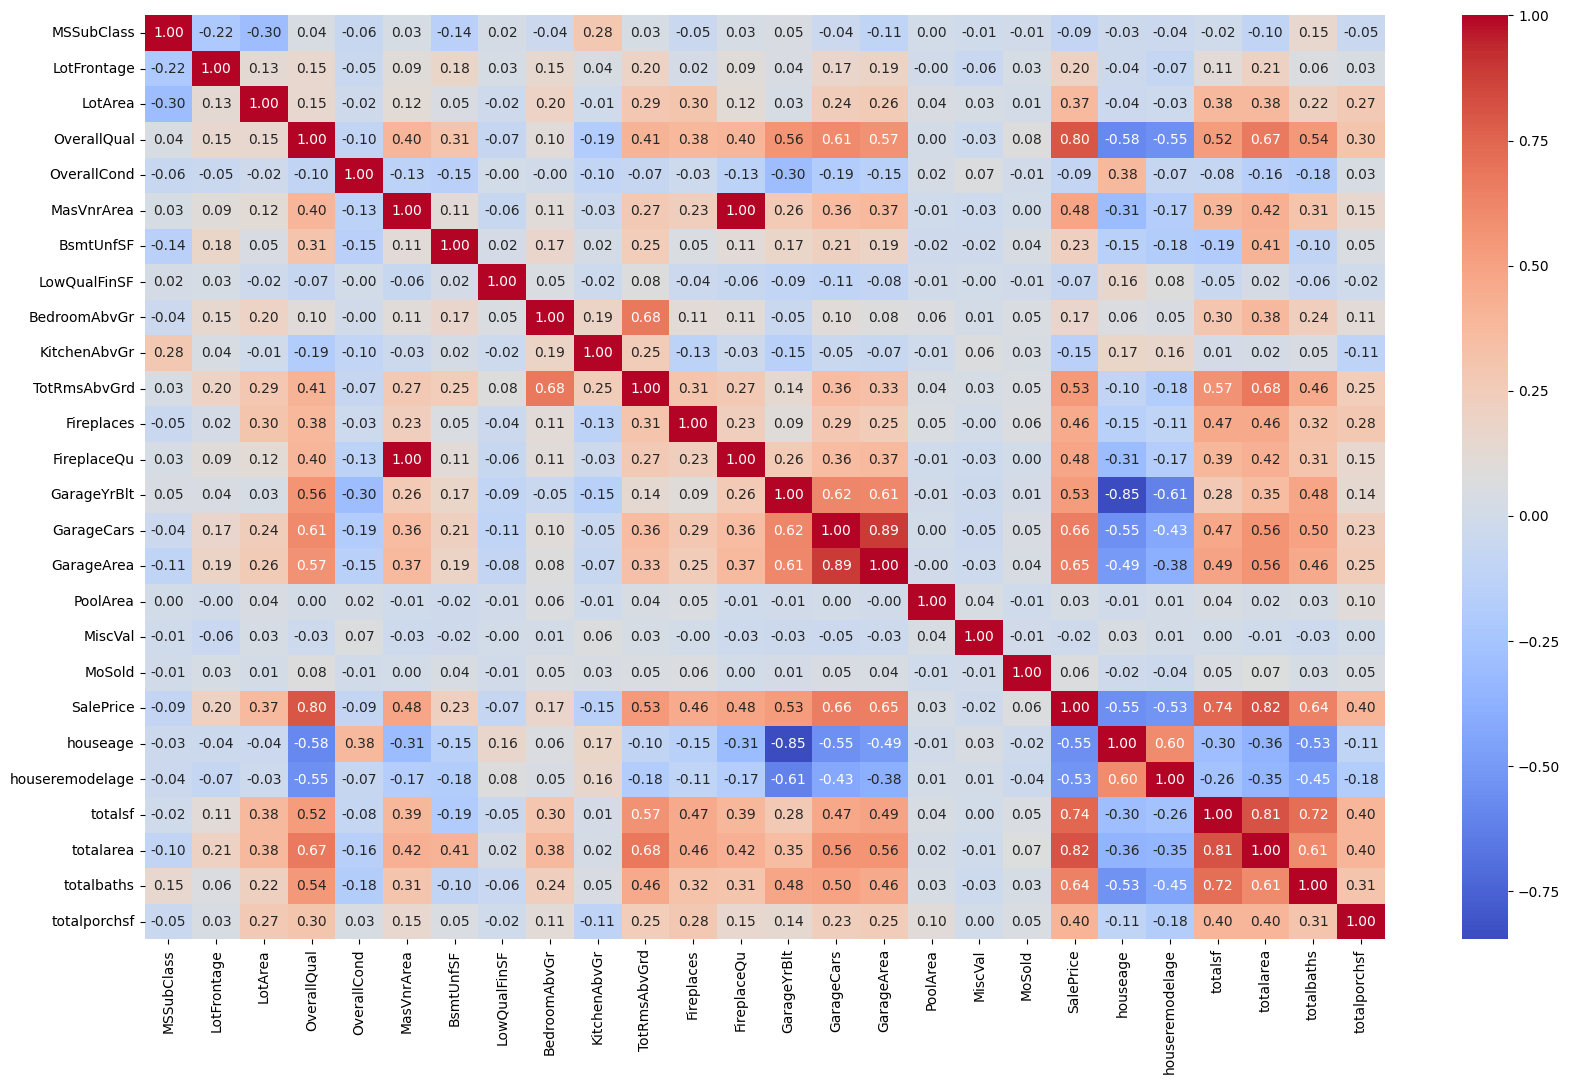

In [82]:
correlation_matrix = train_data.corr(numeric_only=True) #//# correlation heatmap using seaborn, is .corr pandas specific?
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [83]:
#//# can drop correlated features such as garage area and garage cars to avoid enforcing that variable

<Axes: xlabel='SalePrice', ylabel='Count'>

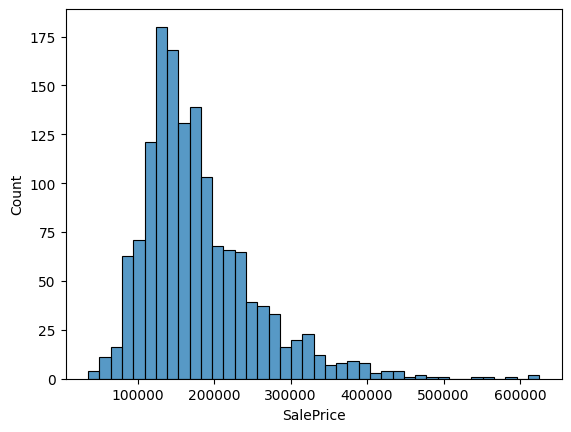

In [84]:
sns.histplot( #//#
    train_data,
    x=train_data['SalePrice']
)

https://youtu.be/UqmulHG4IvY?feature=shared&t=6686